# **PCA (Principal Component Analysis)**




---



**Principal Component Analysis (PCA)** is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning.

High dimensionality means that the dataset has a large number of features. The primary problem associated with high-dimensionality in the machine learning field is model overfitting, which reduces the ability to generalize beyond the examples in the training set. Richard Bellman described this phenomenon in 1961 as the Curse of Dimensionality where "Many algorithms that work fine in low dimensions become intractable when the input is high-dimensional."

The ability to generalize correctly becomes exponentially harder as the dimensionality of the training dataset grows, as the training set covers a dwindling fraction of the input space. Models also become more efficient as the reduced feature set boosts learning rates and diminishes computation costs by removing redundant features.

PCA can also be used to filter noisy datasets, such as image compression. The first principal component expresses the most amount of variance. Each additional component expresses less variance and more noise, so representing the data with a smaller subset of principal components preserves the signal and discards the noise.



---



**Primer:**

PCA makes maximum variability in the dataset more visible by rotating the axes. PCA identifies a list of the principal axes to describe the underlying dataset before ranking them according to the amount of variance captured by each.

the first of the principal components (PC1) is a synthetic variable constructed as a linear combination to determine the magnitude and the direction of the maximum variance in the dataset. This component has the highest variability of all the components and therefore the most information. The second principal component (PC2) is also a synthetic linear combination which captures the remaining variance in the data set and is not correlated with PC1. The following principal components similarly capture the remaining variation without being correlated with the previous component.

PCA is an unsupervised learning algorithm as the directions of these components is calculated purely from the explanatory feature set without any reference to response variables.

The number of feature combinations is equal to the number of dimensions of the dataset and in general set the maximum number of PCAs which can be constructed.



---



**Measurement:**

Eigenvectors and eigenvalues are measures used to quantify the direction and the magnitude of the variation captured by each axis. Eigenvector describes the angle or direction of the axis through the data space, and the eigenvalue quantifies the magnitude of the variance of the data on the axis.

A is an x n matrix, ƛ is the eigenvalue, and the X is the eigenvector.
The number of feature combinations is equal to the number of dimensions of the dataset. For example, a dataset with ten features will have ten eigenvalues/eigenvector combinations.

The correlation between each principal component should be zero as subsequent components capture the remaining variance. Correlation between any pair of eigenvalue/eigenvector is zero so that the axes are orthogonal, i.e., perpendicular to each other in the data space.

The line which maximizes the variance of the data once it is projected into the data space is equivalent to finding the path which minimizes the least-squares distance of the projection.



---



**Assumptions:**

PCA is based on the Pearson correlation coefficient framework and inherits similar assumptions.

*Sample size*: Minimum of 150 observations and ideally a 5:1 ratio of observation to features (Pallant, 2010)

*Correlations*: The feature set is correlated, so the reduced feature set effectively represents the original data space.

*Linearity*: All variables exhibit a constant multivariate normal relationship, and principal components are a linear combination of the original features.

*Outliers*: No significant outliers in the data as these can have a disproportionate influence on the results.

*Large variance implies more structure*: high variance axes are treated as principal components, while low variance axes are treated as noise and discarded.



---



**Applied PCA Workflow:**

Theocratically, PCA linear transformation can also be conducted by the input layer weights of the neural network. However, when scaling the neural network, the size of the dataset required to calculate the network weights increases and overfitting can become a problem.

On the other hand, PCA reduces the number of the input nodes and conversely the minimum size of the dataset to train the network.

1. Normalize the data
PCA is used to identify the components with the maximum variance, and the contribution of each variable to a component is based on its magnitude of variance. It is best practice to normalize the data before conducting a PCA as unscaled data with different measurement units can distort the relative comparison of variance across features.

2. Create a covariance matrix for Eigen decomposition
A useful way to get all the possible relationship between all the different dimensions is to calculate the covariance among them all and put them in a covariance matrix which represents these relationships in the data. Understanding the cumulative percentage of variance captured by each principal component is an integral part of reducing the feature set.

3. Select the optimal number of principal components
The optimal number of principal components is determined by looking at the cumulative explained variance ratio as a function of the number of components. The choice of PCs is entirely dependent on the tradeoff between dimensionality reduction and information loss. The graphical representation of the cumulative variance below shows that nearly 75% of the variance can be attributed to just 100/784 features and 95% to 300/784 indicating high feature redundancy.



---



**PCA Limitations:**

*Model performance*: PCA can lead to a reduction in model performance on datasets with no or low feature correlation or does not meet the assumptions of linearity.

*Classification accuracy*: Variance based PCA framework does not consider the differentiating characteristics of the classes. Also, the information that distinguishes one class from another might be in the low variance components and may be discarded.

*Outliers*: PCA is also affected by outliers, and normalization of the data needs to be an essential component of any workflow.

*Interpretability*: Each principal component is a combination of original features and does not allow for the individual feature importance to be recognized.




---



**Conclusions:**

PCA is a handy addition to the data scientist toolkit and will improve model performance in most scenarios. There are some extensions to mitigate specific limitations of PCA in the Scikit-Learn library. These include RandomizedPCA, which is suitable for quickly approximate the first few principal components in very high-dimensional data, and SparsePCA which introduces a regularization tuning parameter for increased sparsity.


# **PCA using python:**

In [ ]:
#Importing required libraries
import numpy as np

In [ ]:
# Generate a dummy dataset
X = np.random.randint(10,50,100).reshape(20,5) 
# Mean centering the data  
X_meaned = X - np.mean(X , axis = 0)

In [ ]:
# Calculating the covariance matrix of the mean-centered data
cov_mat = np.cov(X_meaned , rowvar = False)

In [ ]:
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [ ]:
#sort the eigenvalues and eigenvectors in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [ ]:
# Select the first n eigenvectors, n is desired dimension of our final reduced data
n_components = 2 
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [ ]:
# Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

In [ ]:
# Output
print('Original data:')
print(X)
print('Dimensions of the original dummy data: ', X.shape)
print('Data after applying dimensionality reduction technique, PCA:')
print(X_reduced)
print('Dimensions of the data after applying PCA: ', X_reduced.shape)

Original data:
[[12 42 27 42 28]
 [13 19 32 40 44]
 [22 44 41 25 47]
 [21 26 44 13 15]
 [13 14 23 17 38]
 [47 44 18 41 21]
 [26 19 32 45 26]
 [26 46 29 27 44]
 [41 16 10 35 20]
 [23 36 28 16 49]
 [28 44 45 21 17]
 [45 17 43 23 24]
 [42 43 21 38 49]
 [21 49 23 19 26]
 [43 40 18 10 15]
 [17 19 22 20 49]
 [49 40 40 20 26]
 [18 32 31 14 41]
 [20 15 11 14 19]
 [13 43 19 28 23]]
Dimensions of the original dummy data:  (20, 5)
Data after applying dimensionality reduction technique, PCA:
[[ -6.24674691   8.38890789]
 [-21.93806515  -2.81267996]
 [-10.20419458  19.90288662]
 [  3.94857634 -10.71211533]
 [-19.81085875 -15.70469739]
 [ 24.0913937    6.31621406]
 [ -1.20209221  -9.34712676]
 [ -4.96652667  17.70710372]
 [ 12.3518564  -21.00486109]
 [-13.15526345   9.33889833]
 [ 12.91722841   7.22791539]
 [ 13.32653767 -11.65816723]
 [  2.70124945  17.97475183]
 [  3.36892135   9.12115541]
 [ 23.63610058  -4.92987929]
 [-22.35142617  -6.16161123]
 [ 21.41803327   7.53128265]
 [-12.90919285   2.594

# **PCA on Iris dataset:**

In [ ]:
import numpy as np

In [ ]:
def PCA(X, num_components):
    X_meaned = X - np.mean(X, axis = 0)
    cov_mat = np.cov(X_meaned, rowvar=False)
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()
    return X_reduced

In [ ]:
import pandas as pd
 
# Reading the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
data.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Preparing the data
x = data.iloc[:,0:4]
 
# Preparing the target
target = data.iloc[:,4]

In [ ]:
# Applying it to PCA function
mat_reduced = PCA(x , 2)

In [ ]:
# Creating a Pandas dataFrame of reduced dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])

In [ ]:
# Concatenating it with target variable to create a complete dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

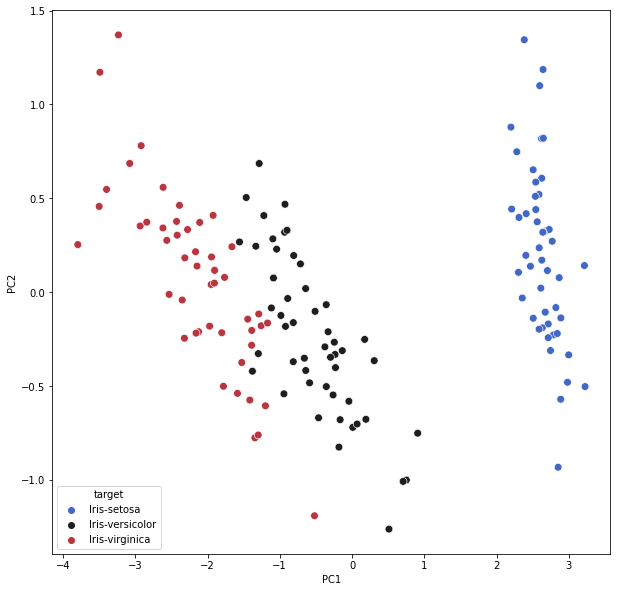

In [ ]:
# Visualization of the results
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))

sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='target', s=60, palette='icefire')
plt.show()